In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
df=pd.read_csv("spam.csv",encoding='latin-1')[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.columns=['label','text']
df['label']=df['label'].map({'ham':0,'spam':1})

In [20]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['text_length']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x: len(x.split()))
df['num_digits']=df['text'].apply(lambda x:sum(c.isdigit() for c in x))
X=df[['text_length','num_words','num_digits']]
y=df['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
df.head()

,label,text,text_length,num_words,num_digits
0,0,"Go until jurong point, crazy.. Available only ...",111,20,0
1,0,Ok lar... Joking wif u oni...,29,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25
3,0,U dun say so early hor... U c already then say...,49,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

from sklearn.naive_bayes import GaussianNB,MultinomialNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,classification_report,confusion_matrix,accuracy_score
print("MSE:",mean_squared_error(y_pred_gnb,y_test))
print("Accuracy:",accuracy_score(y_pred_gnb,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred_gnb,y_test))
print("Classification Report:\n",classification_report(y_pred_gnb,y_test))

MSE: 0.019730941704035873
Accuracy: 0.9802690582959641
Confusion Matrix: [[953  10]
 [ 12 140]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       963
           1       0.93      0.92      0.93       152

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

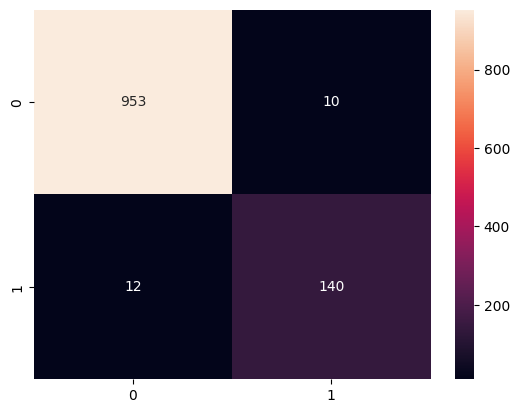

In [42]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred_gnb,y_test),annot=True,fmt='d')

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
vectorizer=CountVectorizer(stop_words='english')
X_counts=vectorizer.fit_transform(df['text'])

tfidf_transformer=TfidfTransformer()
X_tfidf=tfidf_transformer.fit_transform(X_counts)

X_train,X_test,y_train,y_test=train_test_split(X_tfidf,df['label'],test_size=0.2,random_state=42)

mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

In [31]:
print("Accuracy:",accuracy_score(y_pred_mnb,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred_mnb,y_test))
print("Classification Report:\n",classification_report(y_pred_mnb,y_test))

Accuracy: 0.968609865470852
Confusion Matrix:
 [[965  35]
 [  0 115]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1000
           1       0.77      1.00      0.87       115

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



<Axes: >

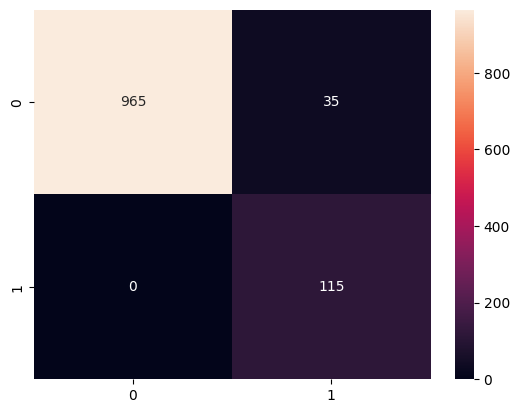

In [33]:
sns.heatmap(confusion_matrix(y_pred_mnb,y_test),annot=True,fmt='d')

HEAD:
    label                                               text  ...  money  urgent
0      0  Go until jurong point, crazy.. Available only ...  ...      0       0
1      0                      Ok lar... Joking wif u oni...  ...      0       0
2      1  Free entry in 2 a wkly comp to win FA Cup fina...  ...      0       0
3      0  U dun say so early hor... U c already then say...  ...      0       0
4      0  Nah I don't think he goes to usf, he lives aro...  ...      0       0

[5 rows x 10 columns]
BernoulliNB Accuracy: 0.895067264573991
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115

Confusion Matrix:
 [[929  36]
 [ 81  69]]


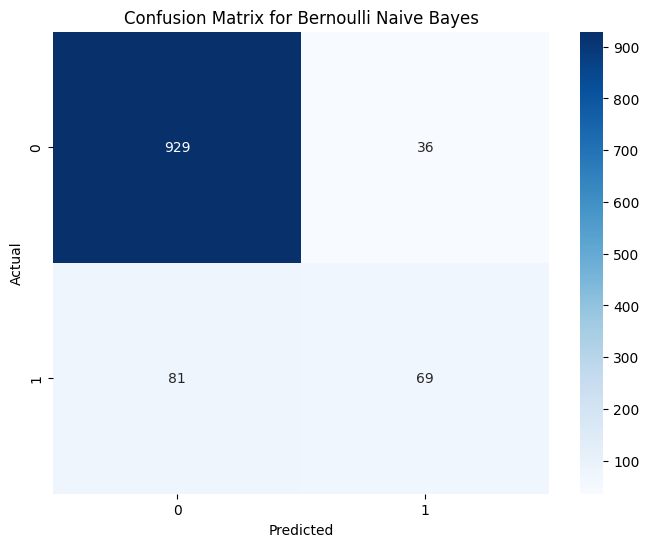

In [ ]:
important_words=['free','win','offer','money','urgent']
for word in important_words:
    df[word]=df['text'].apply(lambda x:1 if word in x.lower() else 0)
X=df[important_words]
y=df['label']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
# Evaluate model
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Classification Report:\n", classification_report(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
# Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()


In [47]:
df.tail()

,label,text,text_len,num_words,num_digits,free,win,offer,money,urgent
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,21,0,0,0,0,0
5568,0,Will Ì_ b going to esplanade fr home?,37,8,0,0,0,0,0,0
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,0,0,0,0,0,0
5570,0,The guy did some bitching but I acted like i'd...,125,26,0,1,0,0,0,0
5571,0,Rofl. Its true to its name,26,6,0,0,0,0,0,0


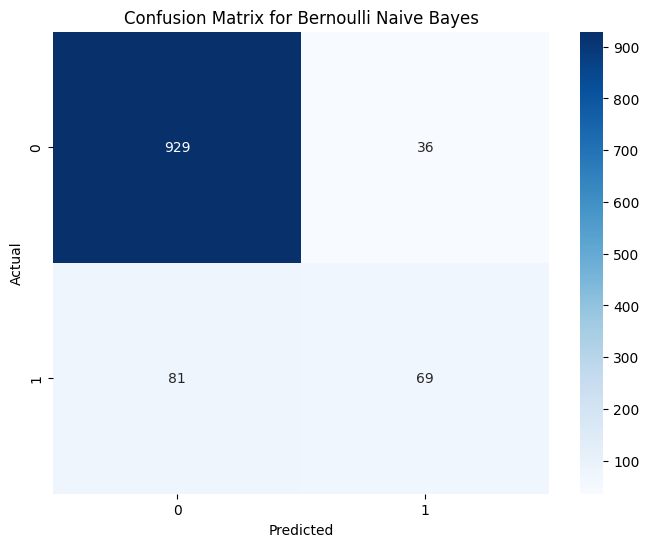

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()

Practice

In [ ]:
df=pd.read_csv("spam.csv",encoding='latin-1')[['v1','v2']]
df.columns=['label','text']
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df['text_len']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(x.split()))
df['num_digits']=df['text'].apply(lambda x:sum(c.isdigit() for c in x))
df.head()

,label,text,text_len,num_words,num_digits
0,0,"Go until jurong point, crazy.. Available only ...",111,20,0
1,0,Ok lar... Joking wif u oni...,29,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25
3,0,U dun say so early hor... U c already then say...,49,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4628\1812772676.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'ham': 0, 'spam': 1})


Dataset head:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Dataset shape: (5572, 2)

Messages by category:
label
0    4825
1     747
Name: count, dtype: int64
Ham (not suspicious): 4825 (86.6%)
Spam (suspicious): 747 (13.4%)

TF-IDF matrix shape: (5572, 8404)

GaussianNB Accuracy: 0.9815
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1453
        Spam       0.93      0.93      0.93       219

    accuracy                           0.98      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672


MultinomialNB Accuracy: 0.9677
              precision    recall  f

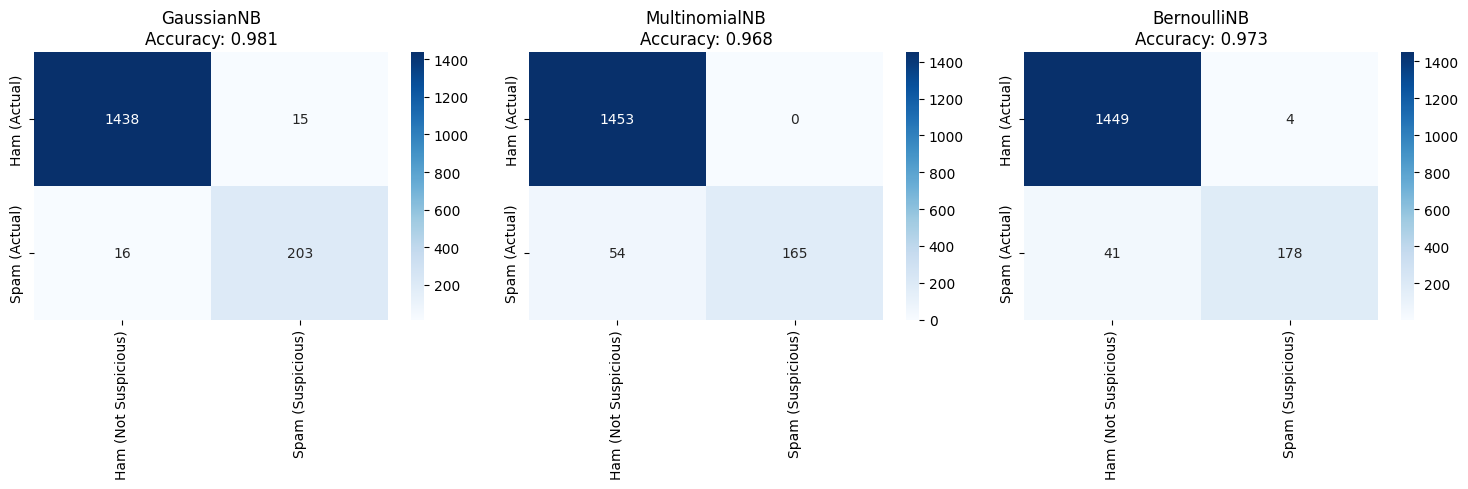


ANALYSIS:

GaussianNB:
• Suspicious messages correctly identified (True Positives): 203
• Genuine messages incorrectly flagged (False Positives): 15
• Spam precision: 0.931
• Ham recall (not flagged correctly): 0.989

MultinomialNB:
• Suspicious messages correctly identified (True Positives): 165
• Genuine messages incorrectly flagged (False Positives): 0
• Spam precision: 1.000
• Ham recall (not flagged correctly): 0.964

BernoulliNB:
• Suspicious messages correctly identified (True Positives): 178
• Genuine messages incorrectly flagged (False Positives): 4
• Spam precision: 0.978
• Ham recall (not flagged correctly): 0.972


NameError: name 'st' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].replace({'ham': 0, 'spam': 1})

print("Dataset head:")
print(df.head())
print("\nDataset shape:", df.shape)

## Explore message content and labels
print("\nMessages by category:")
print(df['label'].value_counts())
print(f"Ham (not suspicious): {df['label'].value_counts()[0]} ({df['label'].value_counts()[0]/len(df)*100:.1f}%)")
print(f"Spam (suspicious): {df['label'].value_counts()[1]} ({df['label'].value_counts()[1]/len(df)*100:.1f}%)")

## Feature engineering (your original features)
df['text_length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))

# Text vectorization (primary features for Naive Bayes)
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

print("\nTF-IDF matrix shape:", X_tfidf.shape)

# Also prepare numeric features (for GNB)
X_numeric = df[['text_length', 'num_words', 'num_digits']]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Split data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.3, random_state=42)
X_train_num, X_test_num, _, _ = train_test_split(X_numeric_scaled, df['label'], test_size=0.3, random_state=42)

## Train all three Naive Bayes models
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

results = {}
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, (name, model) in enumerate(models.items()):
    if name == 'GaussianNB':
        model.fit(X_train_num, y_train)
        y_pred = model.predict(X_test_num)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': acc, 'predictions': y_pred}
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Ham (Not Suspicious)', 'Spam (Suspicious)'],
                yticklabels=['Ham (Actual)', 'Spam (Actual)'])
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.3f}')

plt.tight_layout()
plt.show()

## Analysis: Correct identifications and false flags
print("\n" + "="*50)
print("ANALYSIS:")
print("="*50)
for name, res in results.items():
    cm = confusion_matrix(y_test, res['predictions'])
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name}:")
    print(f"• Suspicious messages correctly identified (True Positives): {tp}")
    print(f"• Genuine messages incorrectly flagged (False Positives): {fp}")
    print(f"• Spam precision: {tp/(tp+fp):.3f}")
    print(f"• Ham recall (not flagged correctly): {tn/(tn+fn):.3f}")

## Test custom user-entered messages
st.title("🔍 Spam Detector - Test Your Messages")
st.header("Enter message to classify:")

def predict_message(text, models_dict):
    # Vectorize new text
    text_vec = vectorizer.transform([text])
    text_tfidf = tfidf_transformer.transform(text_vec)
    text_num = scaler.transform([[len(text), len(text.split()), sum(c.isdigit() for c in text)]])
    
    predictions = {}
    for name, model in models_dict.items():
        if name == 'GaussianNB':
            pred = model.predict(text_num)[0]
            prob = model.predict_proba(text_num)[0]
        else:
            pred = model.predict(text_tfidf)[0]
            prob = model.predict_proba(text_tfidf)[0]
        predictions[name] = {'label': 'Spam (Suspicious)' if pred == 1 else 'Ham (Not Suspicious)', 
                           'confidence': max(prob)}
    return predictions

# Interactive test (uncomment if using Streamlit)
# message = st.text_area("Enter message:", height=100)
# if st.button("Classify") and message:
#     preds = predict_message(message, models)
#     st.subheader("Predictions:")
#     for name, p in preds.items():
#         st.metric(name, p['label'], f"{p['confidence']:.1%}")

print("\nExample tests:")
test_messages = [
    "Hey, free iPhone giveaway! Click now!",
    "Meeting at 3pm tomorrow, see you there.",
    "URGENT: Your account needs verification NOW!"
]

for msg in test_messages:
    print(f"\nMessage: '{msg}'")
    preds = predict_message(msg, models)
    for name, p in preds.items():
        print(f"  {name}: {p['label']} (conf: {p['confidence']:.2f})")